<h1 style="color:Red;"> Importing the libaries </h1>

In [34]:
import pandas as pd
import numpy as np

<h1 style="color:Green;"> Sanitisation </h1>

In [7]:
FullSetClean = pd.read_csv("data_edited3.csv")

#####
"""
Put Further Sanitation Code here.
OR any sanitation code
"""
FullSetClean = FullSetClean.drop(columns = "currency")

stateBin = []
for row in FullSetClean["state"]:
    if row == "successful":
        stateBin.append(1)
    else:
        stateBin.append(0)

FullSetClean["StateBin"] = stateBin
FullSetClean = FullSetClean.drop(columns = "state")
FullSetClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45585 entries, 0 to 45584
Data columns (total 9 columns):
name                45585 non-null object
category            45585 non-null object
deadline            45585 non-null object
launched            45585 non-null object
backers             45585 non-null int64
country             45585 non-null object
usd_pledged_real    45585 non-null float64
usd_goal_real       45585 non-null float64
StateBin            45585 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ MB


In [8]:
####################################
#Colection Of Functions To Be Coded#
#
####################################

In [111]:

def StartingChar(string : str):
    return string[0]

def Length(string : str):
    return len(string)

def NumberOfWords(string :  str):
    output = 0
    string = string.split()
    for word in string:
         if any(c.isalpha() for c in word): ##sees if there is a letter in the collection of chars
                output += 1
    return output

def Capitilisation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char.islower():
            plus +=1
        elif char.isupper():
            minus += 1
    return (plus/(plus + minus))

def Punctuation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char in ". , / ? ; : ‘ () !”":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def nonPunctuation(string:str):
    plus = 0
    minus = 0
    for char in string:
        if char in "\|£$%^&*-_+={}[]@~#<>¬":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def Vowels(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "aeiou":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def Plositives(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "ptkbdg":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def frictives(string : str):
    plus = 0
    minus = 0
    string  = string.lower()
    for char in string:
        if char in "fsvz":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def alliteration(string : str):
    output = 0
    string = string.lower()
    string = string.split()
    previousLetter = ""
    output = 0
    for word in string:
        if word[0] == previousLetter:
                output += 1
        else:
            previousLetter = word[0]
        
    return output

functionList = [
                [Length , "Word Length"],
                [NumberOfWords , "Number Of Words"],
                [Capitilisation , "Capitilisation"],
                [Punctuation , "Punctuation"],
                [nonPunctuation , "nonPunctuation"],
                [Vowels , "Vowels"],
                [Plositives, "Plositives"],
                [frictives,"frictives"],
                [alliteration,"alliteration"]
               ]
    
print(NumberOfWords("Test Test test a!")) 
print (frictives("test test test"))
print (Capitilisation("TEst Test Test"))
print (alliteration("Fest Test test"))

4
0.25
0.6666666666666666
1


In [112]:
# At some point this will be changed to a genralised function.
#base plan:
#all the analytics function will take a string return a number (float or int 64 )

#there will be an itterator high order function that takes the analytic function. 
#and the applies it to all of the titles and returns a list

import datetime

###The itterator high order

def itterator(function,ColName,dataSet):
    output = list()
    for n , string in enumerate(dataSet["name"]):
        output.append(function(string))
    dataSet[ColName] = output
    


In [113]:
def dateTimeitterator(dataSet):
    Launchweekdays = []
    Launchhours = []
    elapsedDays= []
    deadlineweekdays = []
    draw = []
    sraw = []
    
    for n , string in enumerate(dataSet["launched"]):
        date , time = string.split(" ")
        day , month ,year = date.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))

        
        Launchweekdays.append(int(raw.weekday()))
        Launchhours.append(int(hour))
        sraw.append(raw)
        
    for n , string in enumerate(dataSet["deadline"]):
        day , month ,year = string.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))
        deadlineweekdays.append(raw.weekday())
        draw.append(raw)
        

    elapsedDays = [(a - b).days for a, b in zip(sraw, draw)]   
    dataSet["LaunchWeekday"] = Launchweekdays
    dataSet["LaunchHour"] =  Launchhours
    dataSet["elapsedDay"] = elapsedDays
    dataSet["deadlineWeekday"] = deadlineweekdays
    
 

In [114]:

for point in functionList:
    itterator(point[0],point[1],FullSetClean)
    print(point[0])

print ("done functions")

<function Length at 0x0000017C5023AA60>
<function NumberOfWords at 0x0000017C50A35158>
<function Capitilisation at 0x0000017C50A35840>
<function Punctuation at 0x0000017C50A35268>
<function nonPunctuation at 0x0000017C50A357B8>
<function Vowels at 0x0000017C50A358C8>
<function Plositives at 0x0000017C50A35730>
<function frictives at 0x0000017C50A35378>
<function alliteration at 0x0000017C50A352F0>
done functions


In [13]:
dateTimeitterator(FullSetClean)
print ("done Timeritterato")

done Timeritterato


In [14]:
#Data base splitting done bellow 

from sklearn.model_selection import train_test_split

train,other = train_test_split(FullSetClean, test_size=0.6,random_state=0);

validation , test = train_test_split(other, test_size=0.5,random_state=0);

train.head()



#FullSetClean.head()
#FullSetClean.info(verbose = True)

,name,category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,StateBin,Word Length,...,Punctuation,nonPunctuation,Vowels,Plositives,frictives,alliteration,LaunchWeekday,LaunchHour,elapsedDay,deadlineWeekday
27204,ImageEn Imaging Library for FireMonkey,Software,31/10/2017,04/09/2017 03:38,56,NZ,21549.73,37476.58,0,38,...,0.105263,0.000000,0.411765,0.147059,0.058824,1,0,3,-57,1
7514,"Blood Guts & Everthing Nuts ""Rock & Shock 2017...",Apparel,04/09/2017,05/08/2017 22:38,2,US,65.00,800.00,0,53,...,0.169811,0.037736,0.305556,0.277778,0.138889,0,5,22,-30,0
1805,Kuazy: Endless Possibilities,Software,21/05/2017,21/04/2017 16:32,1,US,40.00,19000.00,0,28,...,0.107143,0.000000,0.400000,0.200000,0.240000,0,4,16,-30,6
2269,A Winter Cocktail Kit from Woodward Extract Co.,Drinks,15/12/2017,18/11/2017 03:59,198,US,11194.00,5000.00,1,47,...,0.170213,0.000000,0.358974,0.230769,0.025641,0,5,3,-27,4
16775,Fire Beside the Railroad Tracks,Poetry,09/04/2017,08/02/2017 20:36,11,US,355.00,1200.00,0,31,...,0.129032,0.000000,0.407407,0.222222,0.111111,0,2,20,-60,6


In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

def select_column_to_add(X_train, y_train, X_val, y_val, columns_in_model, columns_to_test):
    
    column_best = None
    columns_in_model = list(columns_in_model)
    
    if len(columns_in_model) == 0:
        acc_best = 0
    elif len(columns_in_model) == 1:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model].values.reshape(-1, 1), y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model].values.reshape(-1, 1)))
    else:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model], y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model]))

    
    for column in columns_to_test:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model+[column]], y_train)
        y_pred = mod.predict(X_val[columns_in_model+[column]])
        acc = accuracy_score(y_val, y_pred)
        
        if acc - acc_best >= 0.005:  # one of our stopping criteria
            acc_best = acc
            column_best = column
        
    if column_best is not None:  # the other stopping criteria
        print('Adding {} to the model'.format(column_best))
        print('The new best validation accuracy is {}'.format(acc_best))
        columns_in_model_updated = columns_in_model + [column_best]
    else:
        print('Did not add anything to the model')
        columns_in_model_updated = columns_in_model
    
    return columns_in_model_updated, acc_best

In [16]:
dropstuff = ["StateBin","name","category","deadline","launched","country","usd_goal_real","usd_pledged_real","backers"]

Ytrain = train[["StateBin"]]  #what you want to predict
Xtrain = train.drop(columns = dropstuff) #all the other data
Yval = validation[["StateBin"]]  #what you want to predict
Xval = validation.drop(columns = dropstuff) #all the other data

Xtrain.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18234 entries, 27204 to 2732
Data columns (total 13 columns):
Word Length        18234 non-null int64
Number Of Words    18234 non-null int64
Capitilisation     18234 non-null float64
Punctuation        18234 non-null float64
nonPunctuation     18234 non-null float64
Vowels             18234 non-null float64
Plositives         18234 non-null float64
frictives          18234 non-null float64
alliteration       18234 non-null int64
LaunchWeekday      18234 non-null int64
LaunchHour         18234 non-null int64
elapsedDay         18234 non-null int64
deadlineWeekday    18234 non-null int64
dtypes: float64(6), int64(7)
memory usage: 1.9 MB


In [17]:
columns_to_test = set(Xtrain)
full_list = set(Xtrain)

columns_in_model = list();

for i in range(4):
    columns_in_model , acc = select_column_to_add(Xtrain,Ytrain,Xval,Yval,columns_in_model,columns_to_test)    
    columns_to_test = full_list.difference(columns_in_model)

Adding alliteration to the model
The new best validation accuracy is 0.5869835466179159
Did not add anything to the model
Did not add anything to the model
Did not add anything to the model


<h1 style="color:DodgerBlue;"> Now For the Graphs </h1>

In [92]:
def percentageAtInterval(dataSet ,varible : str,splits : int) -> list :
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    print(maximum , minimum)
    difference = maximum - minimum
    space = difference / splits
    output = [[a,[0,0]] for a in np.arange(minimum,maximum,space)]
    testLevels = [a for a in np.arange(minimum,maximum,space)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput
    

Word Length
60 1
Number Of Words
16 1
Capitilisation
1.0 0.0
Punctuation
0.5666666666666667 0.0
nonPunctuation
0.46153846153846156 0.0
Vowels
1.0 0.0
Plositives
1.0 0.0
frictives
0.6666666666666666 0.0
alliteration
6 0


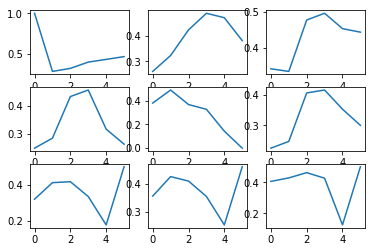

In [116]:
import matplotlib.pyplot as plt
test["Vowels"].max()
for n , Fun in enumerate(functionList):

    print(Fun[1])
    LookList = percentageAtInterval(FullSetClean , Fun[1] , 6)
    plt.subplot(3,3,n + 1)
    plt.plot(LookList)